In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import erf
import math as mt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Chisq minimization with Montecarlo Sampling

In [2]:
x,y,err = np.loadtxt('chi2.txt', unpack=True).T

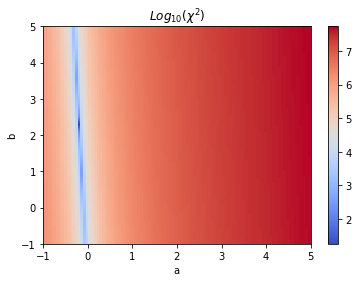

In [3]:
chi2 = np.zeros( (100, 100, 100) )

a = np.linspace(-1, 5, 100)
b = np.linspace(-1, 5, 100)
c = np.linspace(-1, 5, 100)

for i in range(0,100):
    for j in range(0,100):
        for k in range(0,100):
            
            chi2[i,j,k] = np.sum( np.power(a[i]*x**2 + b[j]*x + c[k] - y,2)/(err**2) )

     
    
t_min = np.unravel_index(chi2.argmin(), chi2.shape)

In [6]:
print(t_min[0], t_min[1], t_min[2])
print(np.argmin(chi2))
print(chi2[t_min])

print ('Results for a,b,c = ')
a[t_min[0]], b[t_min[1]], c[t_min[2]]

13 54 50
135450
18.239030310957983
Results for a,b,c = 


(-0.21212121212121215, 2.272727272727273, 2.0303030303030303)

741 29.92792792792793
999 40.0
999 40.0


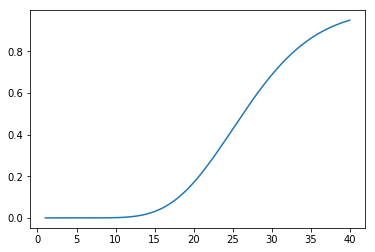

In [11]:
#Valores para sigma
sigma1=0.68268949
sigma2=0.95449974
sigma3=0.9973002

sigma=np.zeros(3)
sigma[0]=sigma1
sigma[1]=sigma2
sigma[2]=sigma3

index_sig = np.zeros(3, int)

dof = len(x)-3
val = np.linspace(1,40, 1000)
gi = np.zeros(1000)
for i in range(len(val)):
    gi[i] = sp.special.gammainc(dof/2.,val[i]/2)


for i in range(len(sigma)):
    index_sig[i] =  int(round(np.argmin( abs(gi - sigma[i]) )) )
    print (index_sig[i], val[index_sig[i]])

plt.plot(val, gi)



In [12]:
print (index_sig)

levels = val[index_sig]
print ('levels 1sima, 2sigma, 3 sigma') 
levels



[741 999 999]
levels 1sima, 2sigma, 3 sigma


array([29.92792793, 40.        , 40.        ])

In [14]:
#Valores reales 
ar=-0.2
br=2
cr=3





In [15]:
best_model = a[t_min[0]]*np.power(x,2) + b[t_min[1]]*x + c[t_min[2]]
real_model = ar*np.power(x,2) + br*x + cr

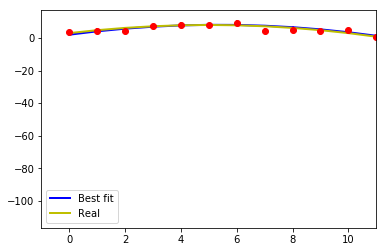

In [16]:
plt.errorbar(x,y,err, fmt='o', color='r')
plt.plot(x, best_model, linewidth=2, color='blue', label='Best fit' )
plt.xlim(-1,11)
plt.plot(x, real_model, linewidth=2, color='y', label='Real')
plt.legend()

# Derive Bayes theorem from $p(x,y)=p(y,x)$

Tenemos que el Teorema de Bayes está dado como 

$$p(y|x)=\frac{p(y|x)p(y)}{p(x)}$$

Para llegar a este resultado basta con usar la regla del producto para la probabilidad  y que $p(x,y)=p(y,x)$. Comencemos de la regla del producto:

$$p(y,x)=p(y|x)p(x)$$

pero $p(y,x)=p(x,y)$, usando nuevamente la regla del producto,

$$p(x,y)=p(x|y)p(y)$$

De esta manera, tenemos que:

$$p(x|y)p(y)=p(y|x)p(x)$$

Lo que nos lleva al Teorema de Bayes:

$$p(y|x)=\frac{p(y|x)p(y)}{p(x)}$$